In [23]:
from bagpy import bagreader
bagpath = "../data/raw/Sample-Data/Sample-Data.bag"
b = bagreader(bagpath)
print(b.topic_table)

[INFO]  Data folder ../data/raw/Sample-Data/Sample-Data already exists. Not creating.
                Topics                         Types  Message Count  \
0                 /gps         sensor_msgs/NavSatFix           4896   
1            /gps_time     sensor_msgs/TimeReference           4896   
2    /image_front_left             sensor_msgs/Image            326   
3                 /imu               sensor_msgs/Imu           4896   
4     /lidar_blue_scan    velodyne_msgs/VelodyneScan            246   
5    /lidar_green_scan    velodyne_msgs/VelodyneScan            246   
6      /lidar_red_scan    velodyne_msgs/VelodyneScan            246   
7   /lidar_yellow_scan    velodyne_msgs/VelodyneScan            245   
8   /pose_ground_truth     geometry_msgs/PoseStamped           4858   
9      /pose_localized     geometry_msgs/PoseStamped            539   
10           /pose_raw     geometry_msgs/PoseStamped           4872   
11                 /tf            tf2_msgs/TFMessage          

Lets explore some of the data

In [16]:
import pandas as pd
for topic in b.topic_table['Topics']:
    csv = b.message_by_topic(topic)
    df = pd.read_csv(csv)
    print(f"Data from topic '{topic}':")
    print(df.head())

Data from topic '/gps':
           Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0  1.501822e+09           6         1501822123            31317949   
1  1.501822e+09          70         1501822123            39287090   
2  1.501822e+09          89         1501822123            41313886   
3  1.501822e+09         159         1501822123            49295902   
4  1.501822e+09         180         1501822123            51310062   

  header.frame_id  status.status  status.service   latitude  longitude  \
0             gps              0               0  42.305971 -83.244833   
1             gps              0               0  42.305971 -83.244833   
2             gps              0               0  42.305971 -83.244833   
3             gps              0               0  42.305971 -83.244833   
4             gps              0               0  42.305971 -83.244833   

     altitude  position_covariance_0  position_covariance_1  \
0  156.021419                    0.0           

Quick check for differences in pose tables

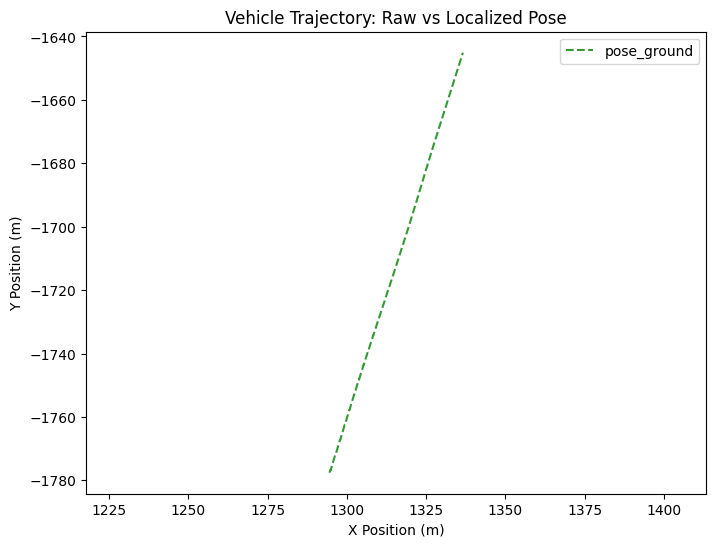

In [ ]:
import matplotlib.pyplot as plt

# Read topics into DataFrames
pose_raw_csv = b.message_by_topic('/pose_raw')
pose_raw = pd.read_csv(pose_raw_csv)

pose_loc_csv = b.message_by_topic('/pose_localized')
pose_loc = pd.read_csv(pose_loc_csv)

pose_ground_csv = b.message_by_topic('/pose_ground_truth')
pose_ground = pd.read_csv(pose_ground_csv)

# Plot X vs Y for each
plt.figure(figsize=(8,6))
plt.plot(pose_raw['pose.position.x'], pose_raw['pose.position.y'], 'r.', alpha=0.5, label='pose_raw')
plt.plot(pose_loc['pose.position.x'], pose_loc['pose.position.y'], 'b-', alpha=0.8, label='pose_localized')
plt.plot(pose_ground['pose.position.x'], pose_ground['pose.position.y'], 'g--', alpha=0.8, label='pose_ground')

plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Vehicle Trajectory: Raw vs Localized Pose")
plt.legend()
plt.axis("equal")   # keep scale consistent
plt.show()


Clean up and organize data into traditional relational db